The dataset is taken from kaggle: https://www.kaggle.com/code/lilyhyseni/exploratory-data-analysis-nyc-foodhub

In [ ]:
# Import necessary libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the food order dataset

df = pd.read_csv("/content/sample_data/food_order.csv")

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24



The DataFrame contains the following fields:
- order_id: Unique identifier for each order.
- customer_id: Unique identifier for each customer.
- restaurant_name: Name of the restaurant.
- cuisine_type: Type of cuisine served by the restaurant.
- cost_of_the_order: Total cost of the order.
- day_of_the_week: Day when the order was placed (Weekday or Weekend).
- rating: Customer rating of the order (1-5).is an object instead of an integer because there are "Not Rated" strings mixed with numerical ratings.
- food_preparation_time: Time taken to prepare the food (in minutes).
- delivery_time: Time taken to deliver the order (in minutes).

In [ ]:
df.shape

(1898, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


   Insights from Descriptive Statistics

   - **Average order cost:** The average cost of an order is \$16.5, indicating a moderately priced menu.
   - **Delivery time:** The average delivery time is around 30 minutes, but there are some outliers with delivery times exceeding 60 minutes. This might warrant further investigation to identify potential bottlenecks in the delivery process.
   - **Preparation time:** The average food preparation time is about 28 minutes.

In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
#Copy the orig datafram
df_clean = df.copy()

In [ ]:
# Rename columns for cleaner access
df_clean.rename(columns={
    'cost_of_the_order': 'cost',
    'food_preparation_time': 'prep_time',
    'delivery_time': 'delivery_time'
}, inplace=True)

# Convert 'rating' to numeric, set 'Not given' as NaN
df_clean['rating'] = pd.to_numeric(df_clean['rating'], errors='coerce')

# Create a flag: is_weekend
df_clean['is_weekend'] = df_clean['day_of_the_week'].apply(lambda x: 1 if x == 'Weekend' else 0)


In [ ]:
df_clean.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost,day_of_the_week,rating,prep_time,delivery_time,is_weekend
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,1
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,0
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,1
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,0


In [ ]:
# ---- Feature Engineering ---- #

# Create a new feature: total_time = prep_time + delivery_time
df_clean['total_time'] = df_clean['prep_time'] + df_clean['delivery_time']


In [ ]:
# Create cost_category based on cost
def categorize_cost(cost):
    if cost < 10:
        return 'Low'
    elif 10 <= cost < 20:
        return 'Medium'
    else:
        return 'High'

df_clean['cost_category'] = df_clean['cost'].apply(categorize_cost)



In [ ]:
# Convert categorical columns to 'category' dtype for memory efficiency
cat_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'cost_category']
df_clean[cat_cols] = df_clean[cat_cols].astype('category')



In [ ]:
# Final check
df_clean.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost,day_of_the_week,rating,prep_time,delivery_time,is_weekend,total_time,cost_category
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,1,45,High
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1,48,Medium
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,0,51,Medium
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,1,40,High
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,0,49,Medium


In [ ]:
df_clean.dtypes


,0
order_id,int64
customer_id,int64
restaurant_name,category
cuisine_type,category
cost,float64
day_of_the_week,category
rating,float64
prep_time,int64
delivery_time,int64
is_weekend,int64


In [ ]:
df_clean.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost,0
day_of_the_week,0
rating,736
prep_time,0
delivery_time,0
is_weekend,0


# Univeriate Analysis

In [ ]:
df['order_id'].nunique()

1898

In [ ]:
df['customer_id'].nunique()

1200

In [ ]:
#Check for duplicate customer IDs
df['customer_id'].value_counts()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
143926,1
89574,1
157711,1


In [ ]:
# Get order frequency per customer
order_counts = df_clean['customer_id'].value_counts().reset_index()
order_counts.columns = ['customer_id', 'order_count']

# Define segmentation logic
def segment_customer(count):
    if count == 1:
        return 'One-time'
    elif count <= 5:
        return 'Occasional'
    else:
        return 'Regular'

order_counts['segment'] = order_counts['order_count'].apply(segment_customer)


# Check segment distribution
segment_counts = order_counts['segment'].value_counts()
segment_counts


,count
segment,
One-time,784
Occasional,402
Regular,14


In [ ]:
df['restaurant_name'].nunique()

178

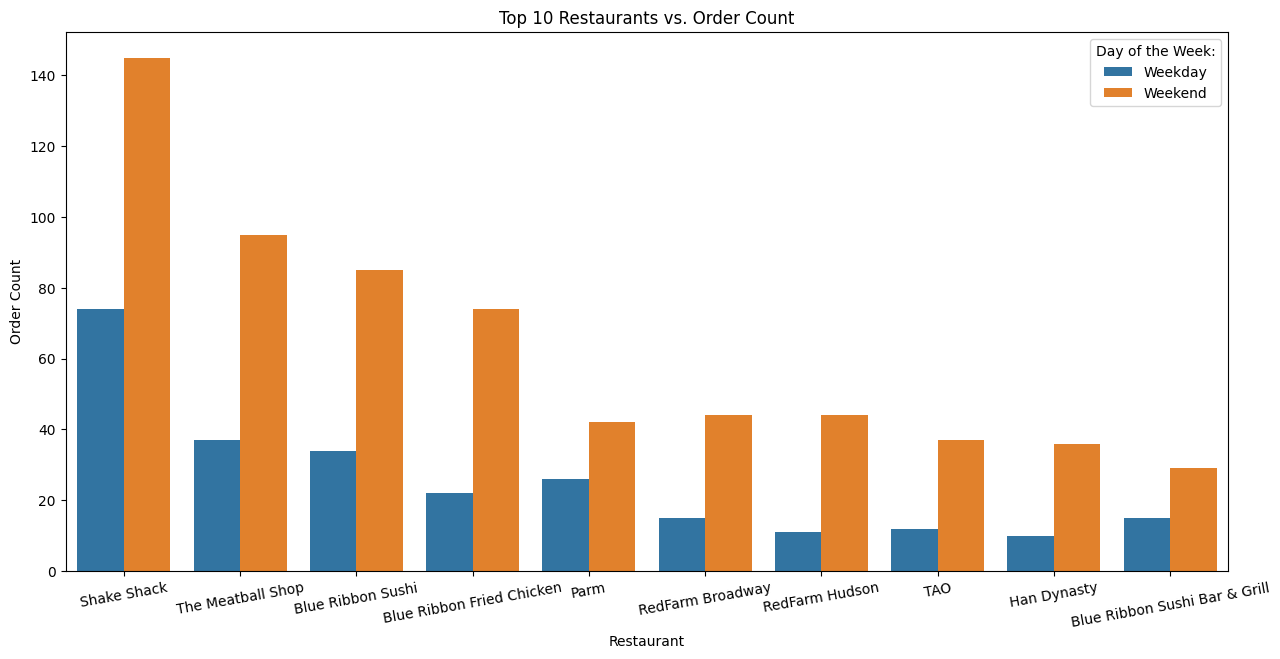

In [ ]:
#Top 10 restaurants by number of orders
top_n = 10
plt.figure(figsize=(15,7))
sns.countplot(data=df_clean, x='restaurant_name' , order=df['restaurant_name'].value_counts().index[:top_n], hue='day_of_the_week')
plt.title('Top {} Restaurants vs. Order Count'.format(top_n))
leg = plt.legend(title='Day of the Week:')
plt.ylabel('Order Count')
plt.xlabel('Restaurant')
plt.xticks(rotation = 10);

Shake Shack leads with the highest overall orders, especially on weekends.
All top restaurants show significantly higher weekend demand.
RedFarm, TAO, and Han Dynasty have minimal weekday traffic mostly weekend driven.
Indicates a clear opportunity to optimize staffing and delivery for weekends.

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

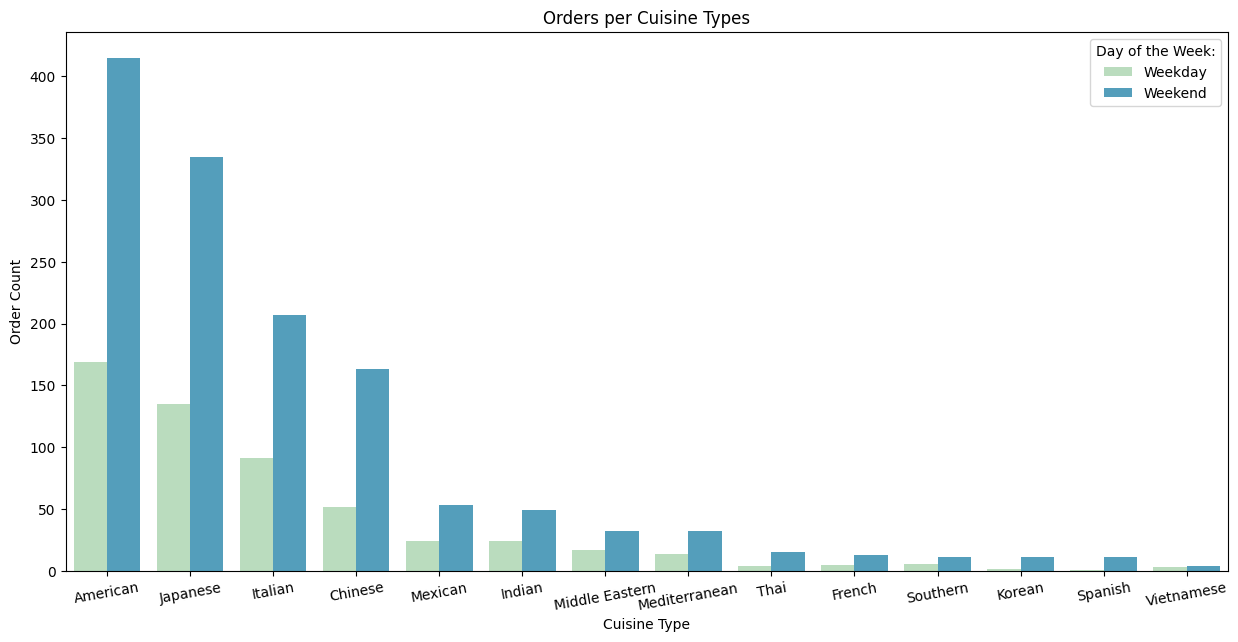

In [ ]:
# Visualize all cuisine types since only a few
plt.figure(figsize = (15,7))
sns.countplot(data = df_clean, x = 'cuisine_type',
              order = df['cuisine_type'].value_counts().index, hue='day_of_the_week', palette='GnBu')
plt.title('Orders per Cuisine Types')
leg = plt.legend(title='Day of the Week:')
plt.ylabel('Order Count')
plt.xlabel('Cuisine Type')
plt.xticks(rotation = 10);

American and Japanese cuisines are the most ordered, especially on weekends.
Italian, Chinese, and Mexican follow, also showing higher weekend demand.
All cuisines show a clear increase in orders during weekends.
Niche cuisines (eg: Korean, Spanish, Vietnamese) have low but consistent demand potential for targeted growth.

<ipython-input-44-45bf9f990e67>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x= 'prep_time', whis=1.5, palette='Purples_d')


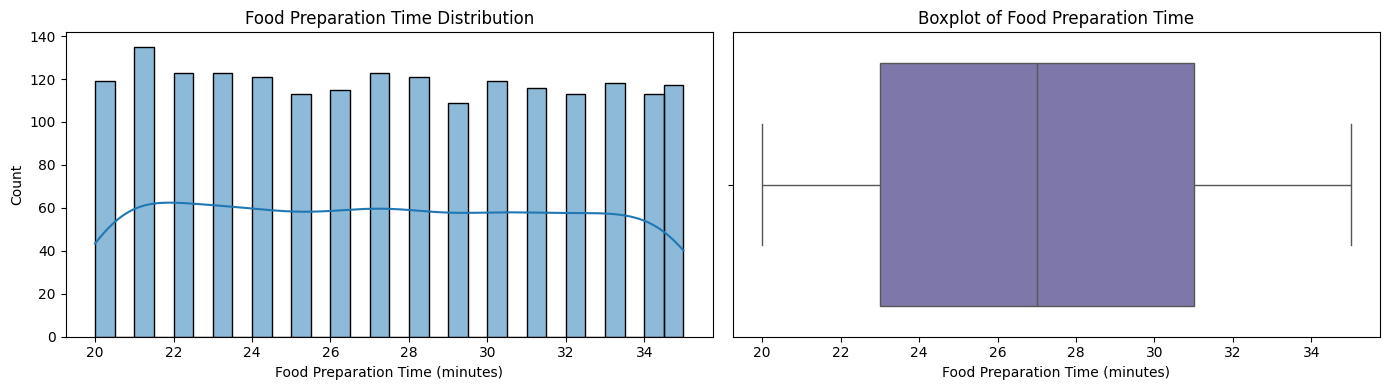

In [ ]:
plt.figure(figsize=(14, 4))

#Frequency distribution of food preparation time
plt.subplot(1, 2, 1)
sns.histplot(df_clean['prep_time'], bins=30, kde=True)
plt.title('Food Preparation Time Distribution')
plt.xlabel('Food Preparation Time (minutes)')

#Boxplot summary of the central tendency, variability, and skewness of the food preparation time distribution
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x= 'prep_time', whis=1.5, palette='Purples_d')
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time (minutes)')

plt.tight_layout()
plt.show()

Prep times are evenly distributed between 20 and 35 minutes.
Median prep time is ~28 minutes.
No outliers detected distribution is uniform and stable.
Indicates consistent kitchen performance across restaurants.

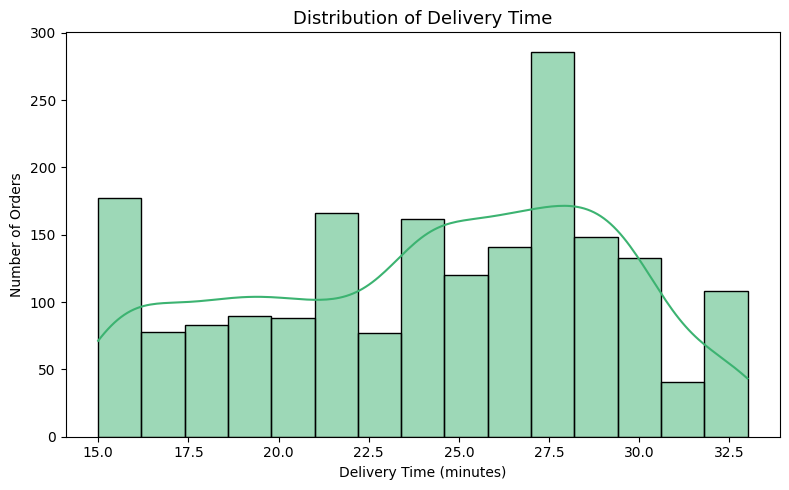

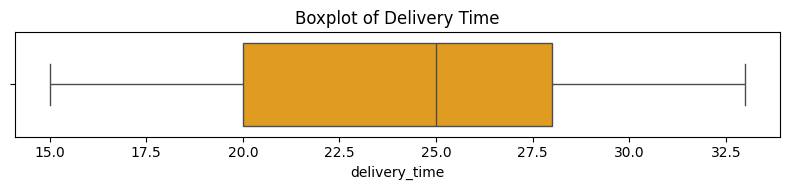

,delivery_time
count,1898.000000
mean,24.161749
std,4.972637
min,15.000000
25%,20.000000
50%,25.000000
75%,28.000000
max,33.000000


In [ ]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['delivery_time'], bins=15, kde=True, color='mediumseagreen')
plt.title("Distribution of Delivery Time", fontsize=13)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

# Boxplot for outlier detection
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_clean['delivery_time'], color='orange')
plt.title("Boxplot of Delivery Time")
plt.tight_layout()
plt.show()

# Summary statistics
df_clean['delivery_time'].describe()


Median delivery time is 25 mins, with a mean of 24.2 mins indicating a slightly left skewed distribution.
80% of orders are delivered between 20 to 28 minutes, suggesting a strong operational consistency.
No statistical outliers detected delivery process is stable across all orders.
Histogram peak at 27 to 28 mins shows this is the most common delivery duration.
Shortest delivery time is 15 mins; longest is 33 mins within an acceptable delivery window.
This consistent delivery performance suggests efficient last mile logistics.

<ipython-input-46-504a66726312>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='day_of_the_week', y='delivery_time', palette='Set3')


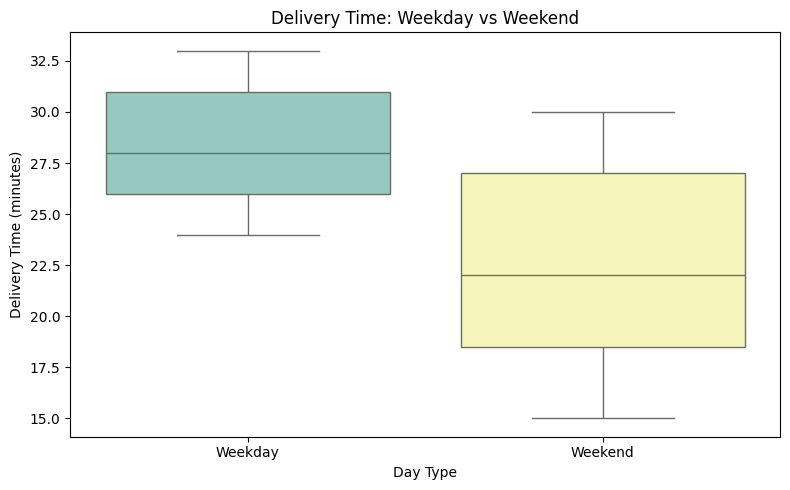

<ipython-input-46-504a66726312>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delivery_time = df_clean.groupby('day_of_the_week')['delivery_time'].mean()


,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


In [ ]:
# Boxplot comparison
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='day_of_the_week', y='delivery_time', palette='Set3')
plt.title("Delivery Time: Weekday vs Weekend")
plt.xlabel("Day Type")
plt.ylabel("Delivery Time (minutes)")
plt.tight_layout()
plt.show()

# Mean delivery time by day type
avg_delivery_time = df_clean.groupby('day_of_the_week')['delivery_time'].mean()
avg_delivery_time.round(2)


Median delivery time on weekdays is ~28 minutes vs ~22 minutes on weekends — indicating faster deliveries on weekends.

Weekday delivery times are more consistent but slightly longer; weekend deliveries have more variability but better speed overall.

Despite higher order volume on weekends (as seen earlier), the platform handles deliveries more efficiently — suggests better resource allocation or fewer traffic delays on weekends.



In [ ]:
# Calculate average delivery time per restaurant
avg_delivery_by_restaurant = df_clean.groupby('restaurant_name')['delivery_time'].mean().reset_index()

# Sort by fastest delivery
fastest_restaurants = avg_delivery_by_restaurant.sort_values(by='delivery_time').head(20)

print("Top 20 Fastest Restaurants (by avg delivery time):")
print(fastest_restaurants)


Top 20 Fastest Restaurants (by avg delivery time):
                 restaurant_name  delivery_time
60             Gaia Italian Cafe      15.000000
71                        Hibino      15.000000
110               Paul & Jimmy's      15.000000
152               The MasalaWala      15.000000
61              Galli Restaurant      16.000000
40                Coppola's East      16.000000
167            Wo Hop Restaurant      16.000000
96                  Market Table      17.000000
28             Byblos Restaurant      18.000000
128                 Samurai Mama      18.000000
134  Schnipper's Quality Kitchen      18.666667
16                   Big Daddy's      19.000000
83             Kambi Ramen House      19.000000
89                 Lamarca Pasta      19.000000
36                  Cho Dang Gol      19.333333
42                  Delicatessen      19.400000
43                      DespaÌ±a      19.500000
18                      Bistango      20.000000
101         Moonstruck on Second     

<ipython-input-47-a64ce635aa0f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delivery_by_restaurant = df_clean.groupby('restaurant_name')['delivery_time'].mean().reset_index()


Multivariate Analysis

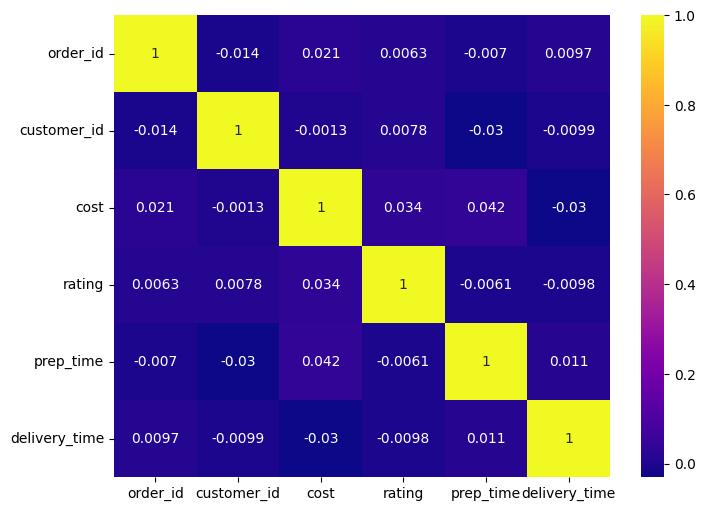

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df_clean[['order_id', 'customer_id', 'cost', 'rating', 'prep_time', 'delivery_time']].corr(numeric_only=True), annot=True, cmap='plasma')
plt.show()

No strong correlations between any variables — all values are close to 0.

Cost, prep_time, and delivery_time show very weak (positive) correlations with each other (~0.01 to 0.04).

Rating is nearly independent of cost, prep, and delivery times — suggests other factors influence customer satisfaction.

Confirms that multivariate modeling may not benefit much from simple linear features alone — interactions or categorical variables might be more impactful.

<ipython-input-49-b35314753c38>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cost_by_cuisine = df_clean.groupby('cuisine_type')['cost'].mean().sort_values(ascending=False).reset_index()
<ipython-input-49-b35314753c38>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_cost_by_cuisine, x='cost', y='cuisine_type', palette='coolwarm')


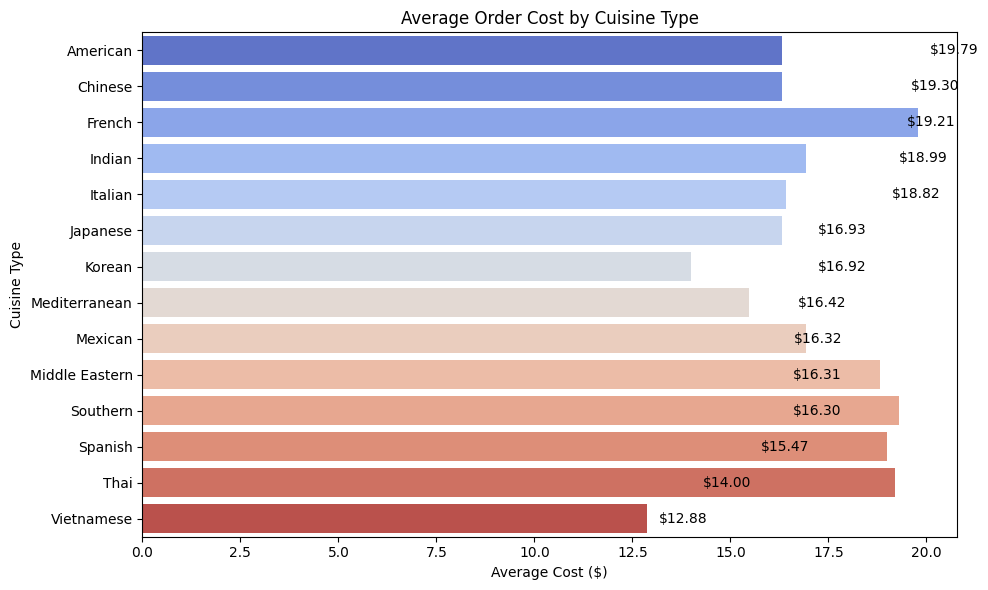

In [ ]:
# Average cost by cuisine type
avg_cost_by_cuisine = df_clean.groupby('cuisine_type')['cost'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_cost_by_cuisine, x='cost', y='cuisine_type', palette='coolwarm')
plt.title('Average Order Cost by Cuisine Type')
plt.xlabel('Average Cost ($)')
plt.ylabel('Cuisine Type')

# Add labels
for i, v in enumerate(avg_cost_by_cuisine['cost']):
    plt.text(v + 0.3, i, f"${v:.2f}", va='center')

plt.tight_layout()
plt.show()

American, Chinese, and French cuisines are the most expensive, all averaging above $19.
Vietnamese and Thai are the most budget friendly, averaging 12.88 and 14 dollars respectively.
Price positioning could be used for targeted promotions or bundle pricing strategies.

<ipython-input-50-c953cc3b48fe>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=cuisine_counts, x='order_count', y='cuisine_type', palette='Set2')


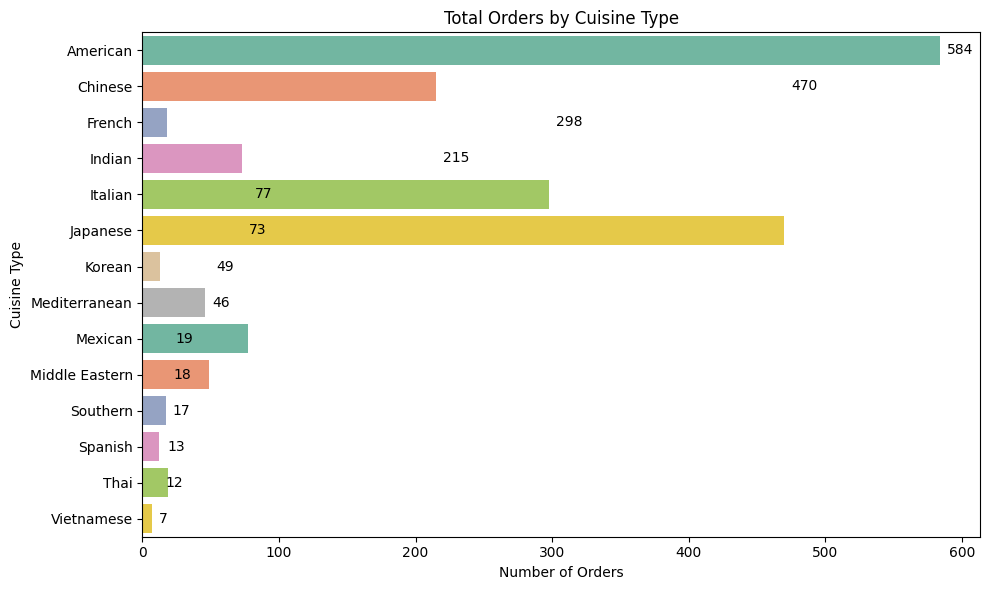

In [ ]:
# Count of orders by cuisine
cuisine_counts = df_clean['cuisine_type'].value_counts().reset_index()
cuisine_counts.columns = ['cuisine_type', 'order_count']

# Plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(data=cuisine_counts, x='order_count', y='cuisine_type', palette='Set2')
plt.title("Total Orders by Cuisine Type")
plt.xlabel("Number of Orders")
plt.ylabel("Cuisine Type")

# Add value labels
for index, row in cuisine_counts.iterrows():
    plt.text(row['order_count'] + 5, index, row['order_count'], va='center')

plt.tight_layout()
plt.show()


American (584) and Chinese (470) cuisines dominate order volume.
French, despite being expensive, has low order count (298), showing it's a premium but niche choice.
Vietnamese, Thai, and Spanish have the fewest orders may benefit from visibility boosts or offers.

<ipython-input-51-6970cc08746e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_prep_by_cuisine_day = df_clean.groupby(['cuisine_type', 'day_of_the_week'])['prep_time'].mean().reset_index()
<ipython-input-51-6970cc08746e>:15: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


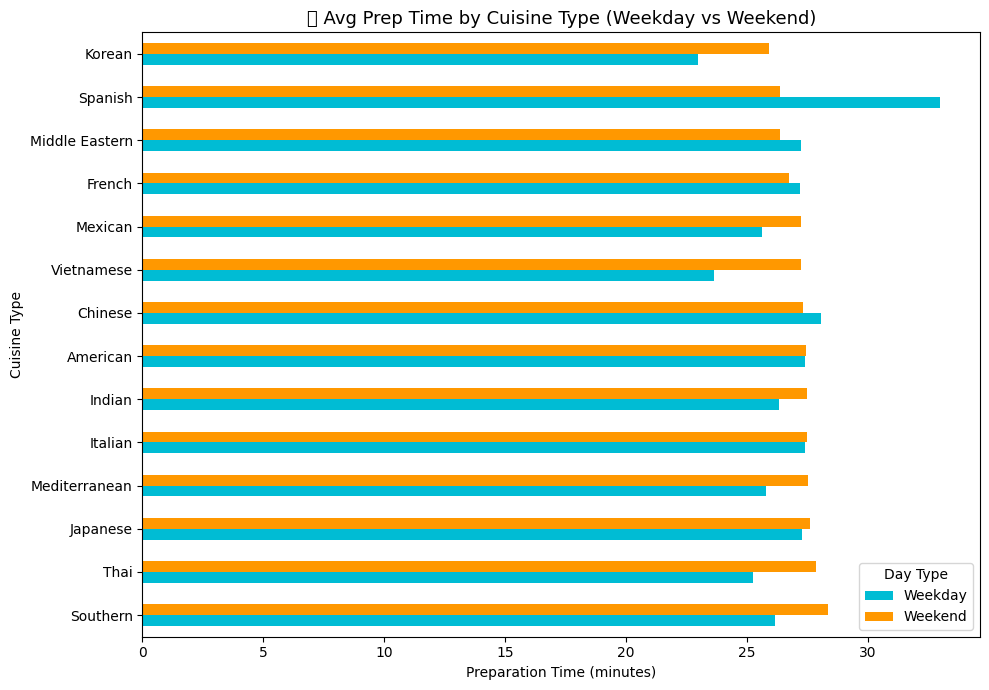

In [ ]:
# Group by cuisine and day type
avg_prep_by_cuisine_day = df_clean.groupby(['cuisine_type', 'day_of_the_week'])['prep_time'].mean().reset_index()

# Pivot for better visualization
pivot_table = avg_prep_by_cuisine_day.pivot(index='cuisine_type', columns='day_of_the_week', values='prep_time').fillna(0)

# Plot
pivot_table = pivot_table.sort_values(by='Weekend', ascending=False)  # Optional: sort by weekend prep time
pivot_table.plot(kind='barh', figsize=(10, 7), color=['#00bcd4', '#ff9800'])

plt.title('⏱️ Avg Prep Time by Cuisine Type (Weekday vs Weekend)', fontsize=13)
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Cuisine Type')
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


Most cuisines show slightly longer prep times on weekends, especially Spanish and Korean.
Consistent prep times across both day types for American, Japanese, and Italian suggest operational stability.
May indicate which cuisines need extra staffing support on weekends.

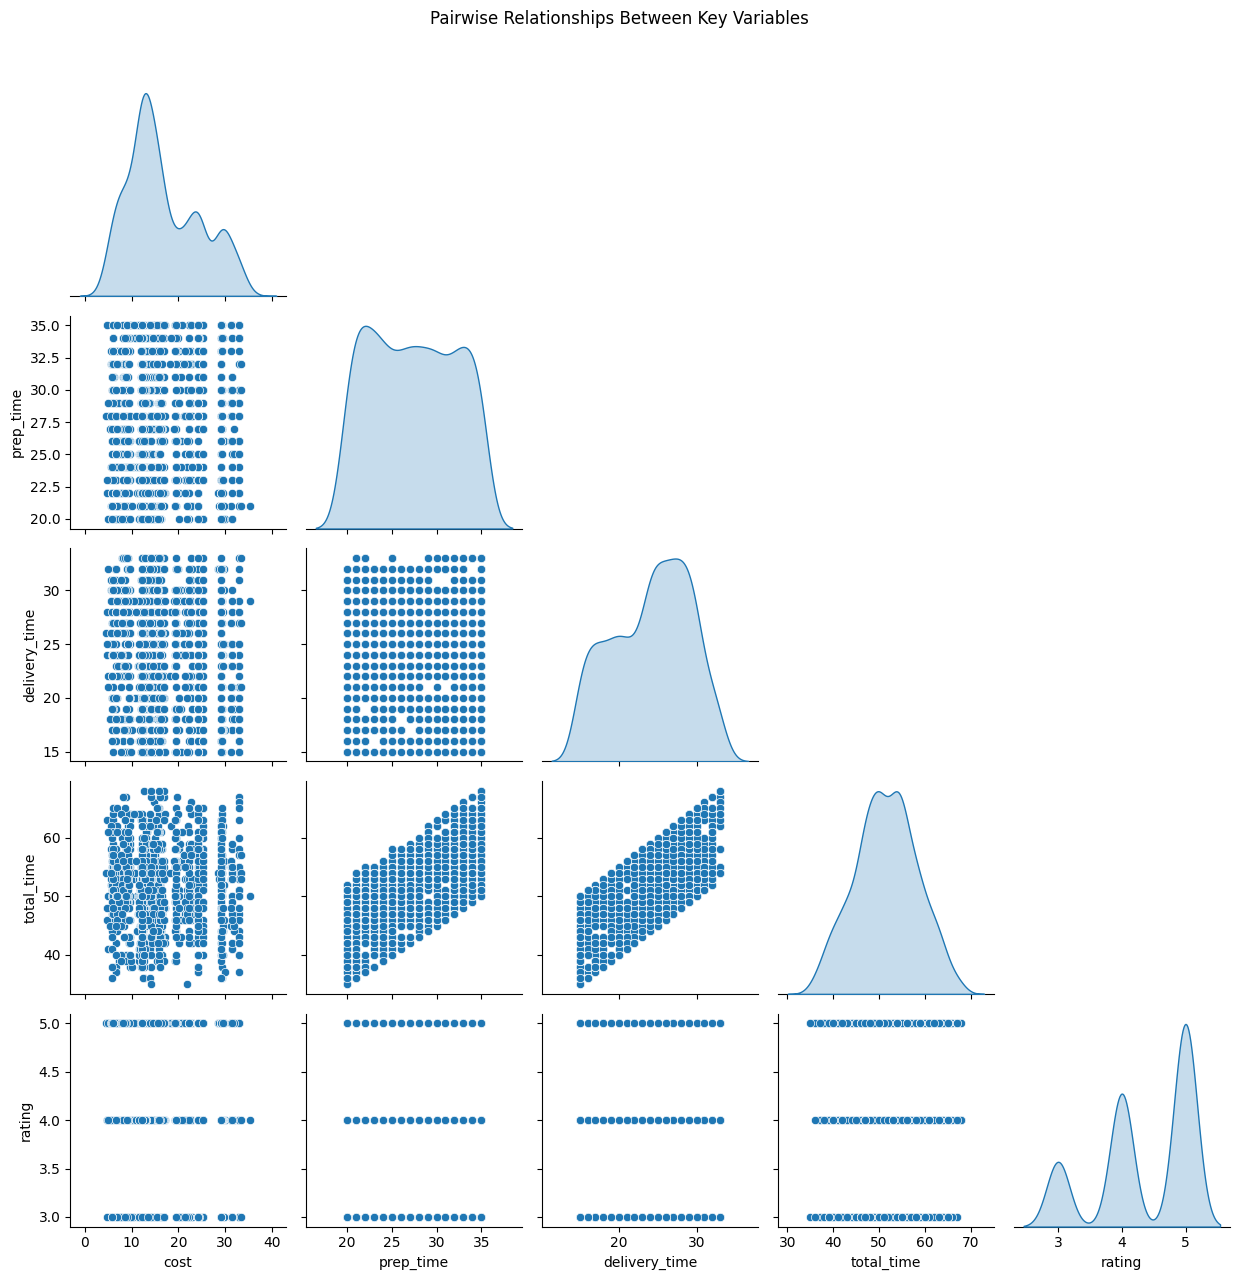

In [ ]:
# Use only rows with valid ratings
pairplot_df = df_clean[['cost', 'prep_time', 'delivery_time', 'total_time', 'rating']].dropna()

# Generate pairplot
sns.pairplot(pairplot_df, diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Key Variables", y=1.02)
plt.tight_layout()
plt.show()


Strong linear relationship between prep time + delivery time = total time, as expected.
Cost, rating, prep, and delivery time have no strong visible correlation with each other.
Ratings are mostly 3 to 5, with discrete jumps confirming it's a categorical variable, not continuous.



##  **Conclusion**
The dataset consists of 1,898 orders and 9 features, capturing order-level insights across restaurant, customer, cost, and time metrics.
- Order Timings:  
  - Avg. preparation time: ~27.4 minutes  
  - Avg. delivery time: ~24.2 minutes  
  - ~10.5% of total orders exceed 60 minutes in combined time operational red flag.
- American and Chinese cuisines dominate the order volume, with 584 and 470 orders respectively.  
  - American cuisine sees the highest weekend demand.
- Shake Shack, The Meatball Shop, and Blue Ribbon Sushi are the most frequently ordered from.
- The Meatball Shop holds the highest average rating.  
  - However, 736 entries (~38.7%) lack ratings, limiting sentiment analysis.
- Avg. cost per order: $16.50 to 29.20
- Weekend deliveries are faster (median 22min) than weekdays (28 mins), indicating better efficiency on weekends.


## **Recommendations**

- Reallocate delivery staff or optimize routing to match the weekend delivery speed and reduce weekday delays.
- Highlight eateries with avg. delivery ≤15 mins (e.g., Gaia Italian Cafe) to attract customers prioritizing speed.
- Use combo offers, loyalty rewards, or special weekend pricing for American and Chinese dishes.
- Boost visibility for cuisines like Vietnamese, Spanish, and Thai (all < 20 orders) through targeted campaigns or limited-time features.
- Spanish and Korean cuisines show higher prep time on weekends — consider forecasting & staffing adjustments.
- Add in-app prompts or discounts to reduce rating gaps and strengthen customer insights.
- Use RFM modeling to identify top customers and run retention + referral campaigns accordingly.
- Include time of day, day of week, and restaurant location in future predictive models (e.g., time to deliver, likelihood of late delivery).

